# 1. Defining the problem

1. Predict if a passenger survived the sinking of the Titanic or no

Sub tasks:

1. Analise by using Decision Tree who had higher survival chances. 
2. Provide recomendations for key changes, which might help to save more lives in the future.

In [182]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 2. Collecting the data

Loading training and test datasets using Pandas


In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
sns.set()
from yellowbrick.classifier import ConfusionMatrix

#Loading data
titanic_train = pd.read_csv('train.csv')
#titanic_test = pd.read_csv('../input/titanic/test.csv')
titanic_test = pd.read_csv('test.csv')

# 3. Exploring the data

In [184]:
#preview data
titanic_train.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [185]:
titanic_train[["Age","Pclass"]][1:30]

,Age,Pclass
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3
6,54.0,1
7,2.0,3
8,27.0,3
9,14.0,2
10,4.0,3


# Missing values

In [186]:
titanic_train.isnull().sum() # Check with alues are empty

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

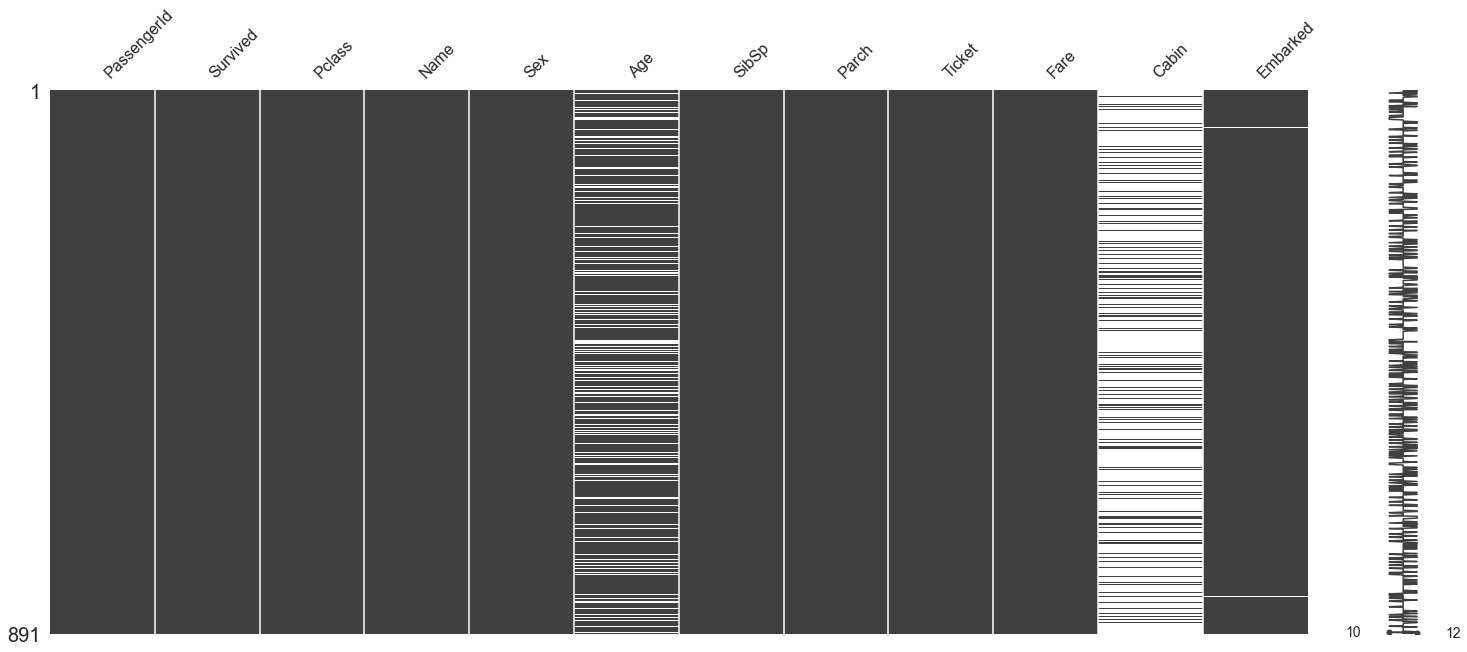

In [187]:
#Missing values in the plot
import missingno as msno
msno.matrix(titanic_train)

In [188]:
titanic_train.groupby(['Pclass','Sex'])['Survived'].sum() # grouping data

Pclass  Sex   
1       female    91
        male      45
2       female    70
        male      17
3       female    72
        male      47
Name: Survived, dtype: int64

In [189]:
titanic_train['_Sex'] = pd.Categorical(titanic_train.Sex).codes #male=1, female =0
titanic_train['_Embarked'] = pd.Categorical(titanic_train.Embarked).codes #S=2, C=0,Q=1 
titanic_train['_CabinType'] = pd.Categorical(titanic_train['Cabin'].astype(str).str[0]).codes
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_Sex,_Embarked,_CabinType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,8


In [190]:
titanic_test['_Sex'] = pd.Categorical(titanic_test.Sex).codes #male=1, female =0
titanic_test['_Embarked'] = pd.Categorical(titanic_test.Embarked).codes #S=2, C=0,Q=1 
titanic_test['_CabinType'] = pd.Categorical(titanic_test['Cabin'].astype(str).str[0]).codes
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_Sex,_Embarked,_CabinType
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,7
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2,7
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,7
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2,7
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2,7


In [191]:
#corelation
cols = ['Age','_Embarked','Fare','Parch','Pclass','_Sex','SibSp','Survived','_CabinType']
titanic_train[cols].corr()

,Age,_Embarked,Fare,Parch,Pclass,_Sex,SibSp,Survived,_CabinType
Age,1.000000,-0.044830,0.096067,-0.189119,-0.369226,0.093254,-0.308247,-0.077221,-0.267270
_Embarked,-0.044830,1.000000,-0.230365,0.043351,0.173511,0.118492,0.071480,-0.176509,0.211699
Fare,0.096067,-0.230365,1.000000,0.216225,-0.549500,-0.182333,0.159651,0.257307,-0.523013
Parch,-0.189119,0.043351,0.216225,1.000000,0.018443,-0.245489,0.414838,0.081629,-0.032548
Pclass,-0.369226,0.173511,-0.549500,0.018443,1.000000,0.131900,0.083081,-0.338481,0.746616
_Sex,0.093254,0.118492,-0.182333,-0.245489,0.131900,1.000000,-0.114631,-0.543351,0.123076
SibSp,-0.308247,0.071480,0.159651,0.414838,0.083081,-0.114631,1.000000,-0.035322,0.041540
Survived,-0.077221,-0.176509,0.257307,0.081629,-0.338481,-0.543351,-0.035322,1.000000,-0.301116
_CabinType,-0.267270,0.211699,-0.523013,-0.032548,0.746616,0.123076,0.041540,-0.301116,1.000000


### Importing libraries for visualization

In [192]:
#Visualization
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns 
sns.set(style="darkgrid")

### Presenting data of Categorical Features:

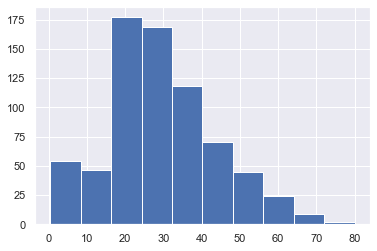

In [193]:
titanic_train['Age'].hist(); 

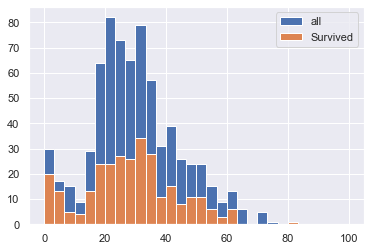

In [194]:

plt_all = plt.hist(titanic_train['Age'],bins = 30,  range = [0,100],label='all')
plt_survived =plt.hist(titanic_train[titanic_train['Survived']==1]['Age'], bins = 30, range = [0,100],label='Survived')

plt.legend()
plt.show()

<AxesSubplot:title={'center':'Age'}, xlabel='Pclass'>

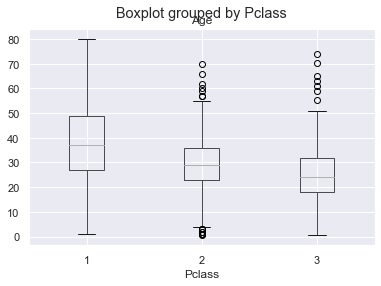

In [195]:

titanic_train.boxplot(column='Age',by='Pclass')

# Pearson Correlation Matrix

<AxesSubplot:>

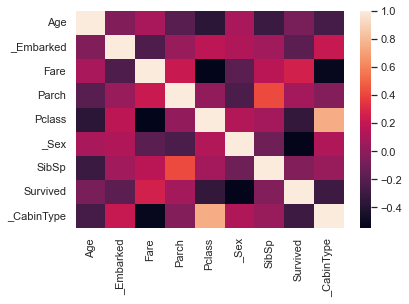

In [196]:
cols = ['Age','_Embarked','Fare','Parch','Pclass','_Sex','SibSp','Survived','_CabinType']
corr = titanic_train[cols].corr()

import seaborn as sns
sns.heatmap(corr)

In [197]:
def bar_chart(feature, stack):
    survived = titanic_train[titanic_train['Survived']==1][feature].value_counts()
    dead = titanic_train[titanic_train['Survived']==0][feature].value_counts()
    my_colors = 'rbkgymc' 
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',color = my_colors, stacked=stack, figsize=(10,5))

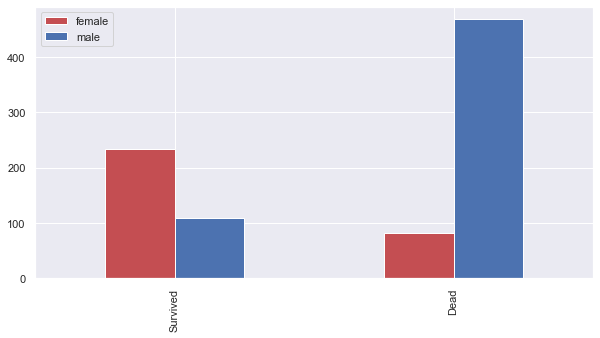

In [198]:
bar_chart('Sex', False)  #Charts shows that woman has higher chance to survive.

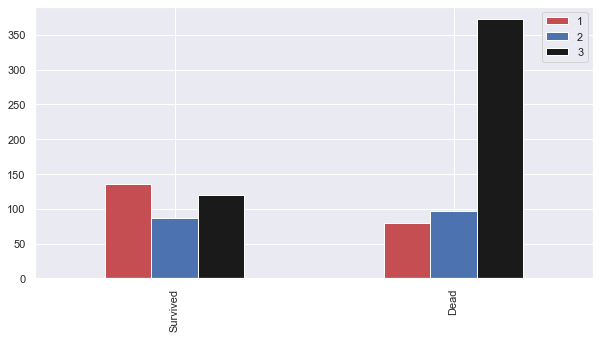

In [199]:
bar_chart('Pclass',False) 

1st class has the highest chance to survive. 3rd class has the lowest chance to survive.

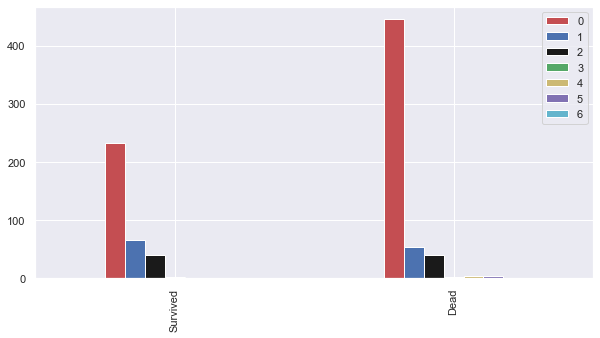

In [200]:
bar_chart('Parch', False)

The Chart confirms a person aboarded with more than 2 parents or children more likely survived
The Chart confirms a person aboarded alone more likely dead

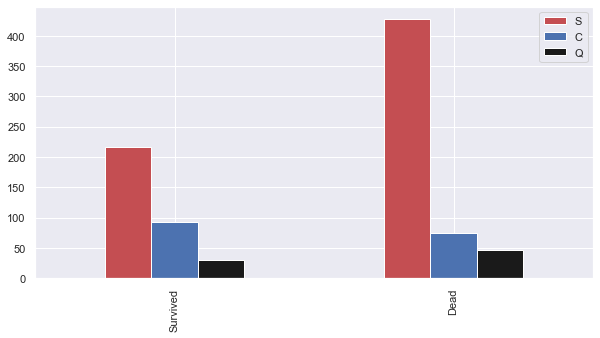

In [201]:
bar_chart('Embarked', False)

The Chart confirms a person aboarded from C slightly more likely survived \
The Chart confirms a person aboarded from Q more likely dead \
The Chart confirms a person aboarded from S more likely dead 

# 4. Features Engineering

In [202]:
#completing missing data

#pulling out the titles
pat = r",\s([^ .]+)\.?\s+"
titanic_train['Title'] =  titanic_train['Name'].str.extract(pat,expand=True)[0]
titanic_train.loc[titanic_train['Title'].isin(['Mlle','Ms','Lady']),'Title'] = 'Miss'
titanic_train.loc[titanic_train['Title'].isin(['Mme']),'Title'] = 'Mrs'
titanic_train.loc[titanic_train['Title'].isin(['Sir']),'Title'] = 'Mr'
titanic_train.loc[~titanic_train['Title'].isin(['Miss','Master','Mr','Mrs']),'Title'] = 'Other' # NOT IN
titanic_train['_title'] = pd.Categorical(titanic_train.Title).codes
titanic_train.groupby('Title')['Title'].count()

Title
Master     40
Miss      186
Mr        518
Mrs       126
Other      21
Name: Title, dtype: int64

In [203]:
#completing missing data

#pulling out the titles
pat = r",\s([^ .]+)\.?\s+"
titanic_test['Title'] =  titanic_train['Name'].str.extract(pat,expand=True)[0]
titanic_test.loc[titanic_test['Title'].isin(['Mlle','Ms','Lady']),'Title'] = 'Miss'
titanic_test.loc[titanic_test['Title'].isin(['Mme']),'Title'] = 'Mrs'
titanic_test.loc[titanic_test['Title'].isin(['Sir']),'Title'] = 'Mr'
titanic_test.loc[~titanic_test['Title'].isin(['Miss','Master','Mr','Mrs']),'Title'] = 'Other' # NOT IN
titanic_test['_title'] = pd.Categorical(titanic_test.Title).codes
titanic_test.groupby('Title')['Title'].count()

Title
Master     23
Miss      101
Mr        228
Mrs        59
Other       7
Name: Title, dtype: int64

In [204]:

#new value - Family Size and IsAlone
#for train
titanic_train['FamilySize'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1
titanic_train['IsAlone'] = 0
titanic_train.loc[titanic_train['FamilySize'] == 1, 'IsAlone'] = 1
#and test
titanic_test['FamilySize'] = titanic_test['SibSp'] + titanic_test['Parch'] + 1
titanic_test['IsAlone'] = 0
titanic_test.loc[titanic_test['FamilySize'] == 1, 'IsAlone'] = 1

In [205]:
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_Sex,_Embarked,_CabinType,Title,_title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,2,8,Mr,2,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,2,Mrs,3,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,2,8,Miss,1,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,2,2,Mrs,3,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2,8,Mr,2,1,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,1,8,Mr,2,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,2,4,Mr,2,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1,2,8,Master,0,5,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,2,8,Mrs,3,3,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,0,8,Mrs,3,2,0


In [206]:
#completing missing age
ageMedian = np.around(titanic_train['Age'].median(),2)
print(ageMedian)

28.0


In [207]:
titanic_train['Age'].fillna(ageMedian, inplace=True)
titanic_test['Age'].fillna(ageMedian, inplace=True)

In [208]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  _Sex         891 non-null    int8   
 13  _Embarked    891 non-null    int8   
 14  _CabinType   891 non-null    int8   
 15  Title        891 non-null    object 
 16  _title       891 non-null    int8   
 17  FamilySize   891 non-null    int64  
 18  IsAlone      891 non-null    int64  
dtypes: float

<AxesSubplot:>

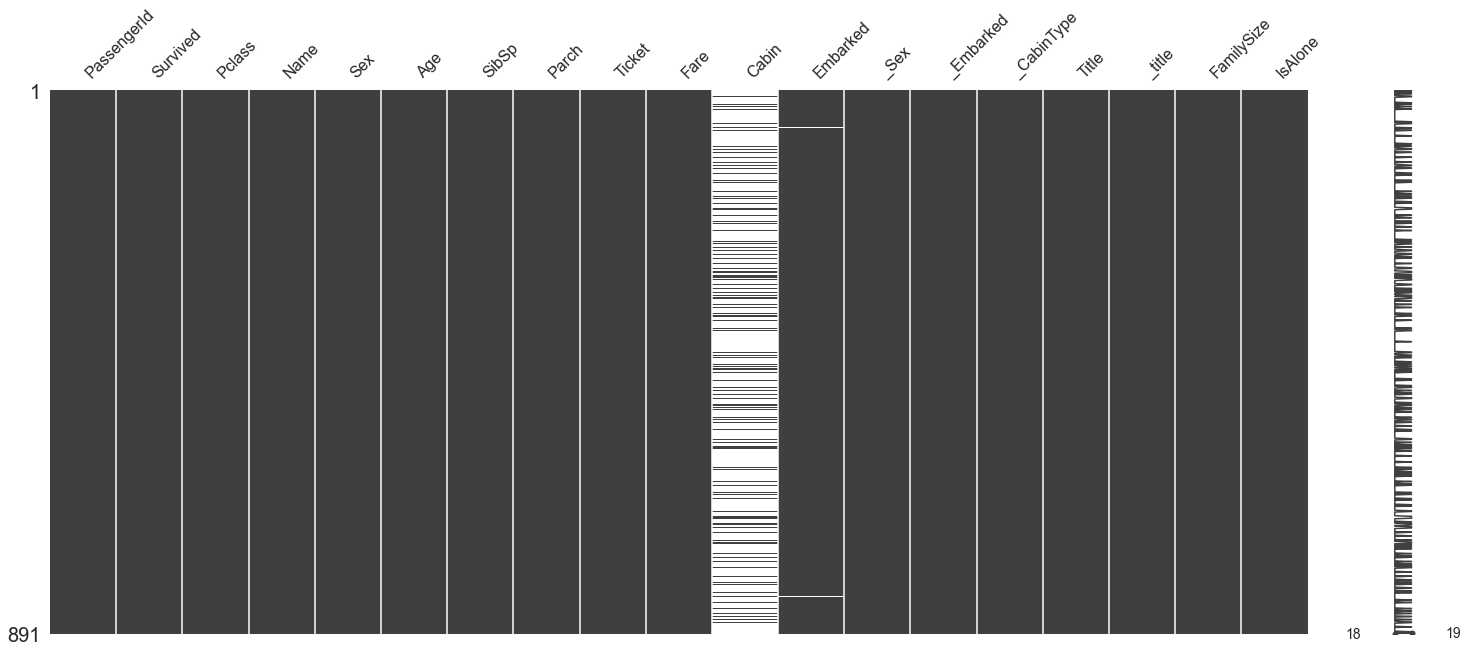

In [209]:
#Missing values in the plot
import missingno as msno
msno.matrix(titanic_train)

<AxesSubplot:>

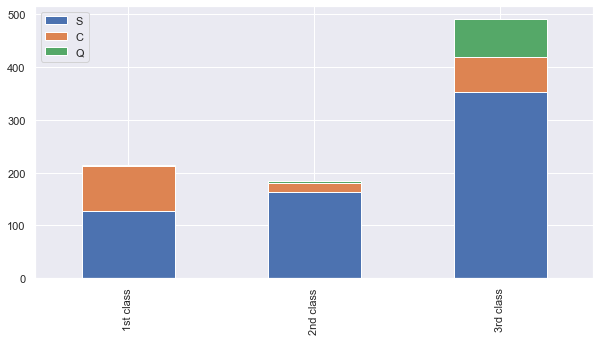

In [210]:
#2 missing value in Embarked

Pclass1 = titanic_train[titanic_train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = titanic_train[titanic_train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = titanic_train[titanic_train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [211]:
titanic_test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,_Sex,_Embarked,_CabinType,Title,_title,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,7,Mr,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,2,7,Mrs,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,7,Miss,1,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,2,7,Mrs,3,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,2,7,Mr,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,1,2,7,Mr,2,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,2,Mr,2,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,2,7,Mrs,3,1,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,1,2,7,Mrs,3,1,1


In [212]:
titanic_train.drop(['Name','Ticket','Sex','Title','Cabin','Embarked','PassengerId'], axis=1, inplace=True)


In [213]:
titanic_test.drop(['Name','Sex','Ticket','Title','Cabin','Embarked','PassengerId'], axis=1, inplace=True)

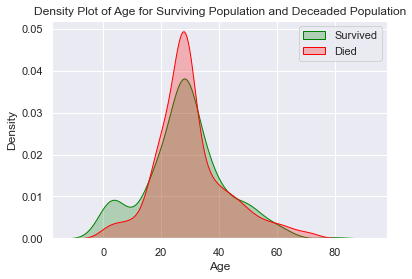

In [214]:
#Measuring the role of Age in survival chances
plt.figure()
sns.kdeplot(titanic_train['Age'][titanic_train['Survived'] == 1], color='Green', shade=True)
sns.kdeplot(titanic_train['Age'][titanic_train['Survived'] == 0], color='Red', shade=True)
plt.legend(['Survived','Died'])
plt.title('Density Plot of Age for Surviving Population and Deceaded Population')
plt.show()

/Users/karolszymczyk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


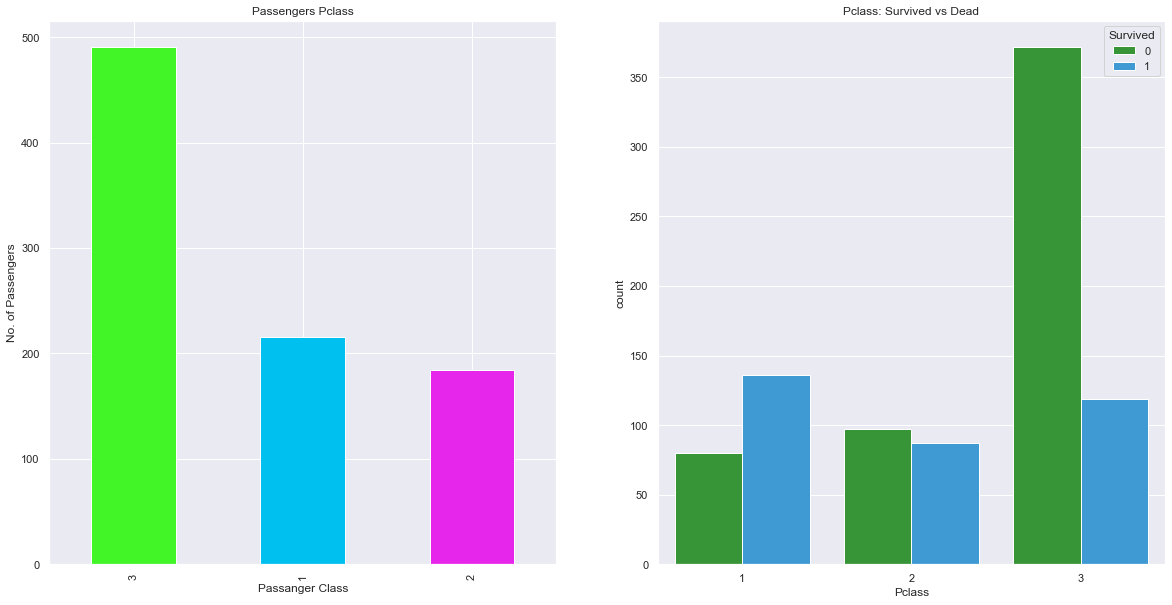

In [215]:
#Measuring the role of Ticket Class in survival chances
fig, a = plt.subplots(1,2,figsize=(20,10))
titanic_train['Pclass'].value_counts().plot.bar(color=['#41F527','#00C0F0','#E726EB'], ax=a[0])
a[0].set_title('Passengers Pclass')
a[0].set_xlabel('Passanger Class')
a[0].set_ylabel('No. of Passengers')
sns.countplot('Pclass', hue='Survived', data=titanic_train, palette=['#28A427','#269EEB'], ax=a[1])
a[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [216]:
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,_Sex,_Embarked,_CabinType,_title,FamilySize,IsAlone
0,0,3,22.0,1,0,7.2500,1,2,8,2,2,0
1,1,1,38.0,1,0,71.2833,0,0,2,3,2,0
2,1,3,26.0,0,0,7.9250,0,2,8,1,1,1
3,1,1,35.0,1,0,53.1000,0,2,2,3,2,0
4,0,3,35.0,0,0,8.0500,1,2,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2,8,4,1,1
887,1,1,19.0,0,0,30.0000,0,2,1,1,1,1
888,0,3,28.0,1,2,23.4500,0,2,8,1,4,0
889,1,1,26.0,0,0,30.0000,1,0,2,2,1,1


# 5. Preparing the model

In [217]:
X = titanic_train[['Pclass', 'Fare', '_Sex', 'IsAlone','Age', 'Survived']]
y = titanic_train['Survived']
X_test = titanic_test[['Pclass', 'Fare', 'IsAlone','Age','']]


X.head()
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [218]:
X = titanic_train.iloc[:,2:]

y = titanic_train.iloc[:,1]
print(y)

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64


In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [220]:
titanic_train

,Survived,Pclass,Age,SibSp,Parch,Fare,_Sex,_Embarked,_CabinType,_title,FamilySize,IsAlone
0,0,3,22.0,1,0,7.2500,1,2,8,2,2,0
1,1,1,38.0,1,0,71.2833,0,0,2,3,2,0
2,1,3,26.0,0,0,7.9250,0,2,8,1,1,1
3,1,1,35.0,1,0,53.1000,0,2,2,3,2,0
4,0,3,35.0,0,0,8.0500,1,2,8,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2,8,4,1,1
887,1,1,19.0,0,0,30.0000,0,2,1,1,1,1
888,0,3,28.0,1,2,23.4500,0,2,8,1,4,0
889,1,1,26.0,0,0,30.0000,1,0,2,2,1,1


In [235]:
tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=40)
tree.fit(X_train, y_train)

print('Dokładność testu: ', tree.score(X_test, y_test))

Dokładność testu:  0.8994413407821229


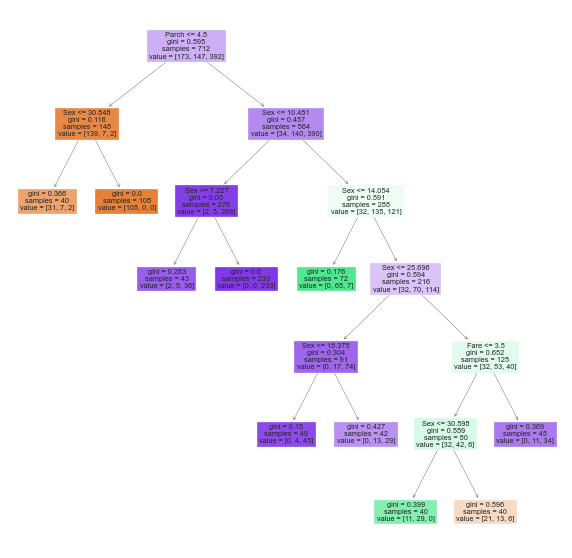

In [243]:
plt.subplots(figsize=(10,10))
plot_tree(tree, filled=True, feature_names=titanic_train.columns[1:])
plt.show()

In [239]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X, y)

print('Dokładność modelu: ' + str(round(clf.score(X, y), 4) * 100) + '%')

scores = cross_val_score(clf, X, y, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Dokładność modelu: 99.78%
Scores: [0.91111111 0.94382022 0.94382022 0.92134831 0.93258427 0.96629213
 0.92134831 0.95505618 0.94382022 0.88764045]
Mean: 0.9326841448189762
Standard Deviation: 0.021802257022051495
